In [37]:
import nltk
import string
import scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier


from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier


from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import *

# Confusion Matrix
from sklearn.metrics import confusion_matrix


from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from multiprocessing import Pool, TimeoutError

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/gabe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gabe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/gabe/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# import the Fake.csv and True.csv files
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

# Part 1

In [3]:
# Combine all of the true data into one list and tokesnize it
true_string = ''.join(true["text"])
true_tokenized = nltk.word_tokenize(true_string)

In [4]:
# Combine all of the fake data into one list and tokesnize it
fake_string = ''.join(fake["text"])
fake_tokenized = nltk.word_tokenize(fake_string)

In [24]:
# Make all the words lowercase and remove the punctuation
true_tokenized = [word.lower() for word in true_tokenized if word.isalnum() or (not "." and not "," and not "?" and not "!" and not "s")]

In [25]:
# Make all the words lowercase and remove the punctuation
fake_tokenized = [word.lower() for word in fake_tokenized if word.isalnum() or (not "." and not "," and not "?" and not "!" and not "s")]

In [7]:
# Print the 100 most common words in the true data
fdist_true = FreqDist(true_tokenized)
print("True: " + str(fdist_true.most_common(100)))

True: [('the', 482174), ('to', 245124), ('of', 204957), ('a', 197860), ('and', 181686), ('in', 180668), ('on', 108342), ('s', 99899), ('said', 99024), ('that', 88095), ('for', 79728), ('is', 55428), ('with', 54485), ('he', 54368), ('trump', 54238), ('it', 49335), ('was', 47940), ('by', 47637), ('as', 47307), ('has', 46242), ('from', 39376), ('his', 38016), ('not', 37589), ('have', 36413), ('be', 34291), ('at', 33164), ('an', 32710), ('would', 31524), ('reuters', 28412), ('who', 27642), ('but', 26596), ('president', 26386), ('are', 26125), ('had', 25672), ('will', 25238), ('we', 22163), ('they', 22064), ('its', 21319), ('this', 21019), ('which', 20809), ('state', 19726), ('been', 19598), ('after', 19375), ('were', 18916), ('government', 18285), ('about', 17422), ('more', 17192), ('i', 17020), ('their', 16826), ('new', 16743), ('house', 16513), ('states', 16506), ('also', 15946), ('united', 15575), ('republican', 15346), ('people', 15126), ('or', 15107), ('told', 14244), ('over', 13839),

In [8]:
# Print the 100 most common words in the fake data
fdist_fake = FreqDist(fake_tokenized)
print("Fake: " + str(fdist_fake.most_common(100)))

Fake: [('the', 527326), ('to', 289638), ('of', 235777), ('and', 224519), ('a', 210576), ('in', 164579), ('that', 150256), ('s', 129631), ('is', 110825), ('for', 92017), ('on', 81064), ('it', 78808), ('he', 77607), ('trump', 74038), ('was', 67786), ('with', 62876), ('his', 58036), ('as', 55766), ('this', 55177), ('be', 48557), ('by', 47334), ('not', 46802), ('are', 46336), ('have', 46027), ('they', 45176), ('i', 43726), ('who', 42270), ('has', 42252), ('at', 41516), ('from', 40740), ('t', 40531), ('you', 40191), ('we', 38002), ('an', 34808), ('about', 32826), ('but', 31403), ('said', 31125), ('their', 30202), ('people', 25997), ('she', 25745), ('her', 25701), ('president', 25591), ('or', 24671), ('what', 24475), ('all', 24430), ('will', 24044), ('would', 23457), ('been', 22991), ('out', 22917), ('one', 22881), ('more', 22371), ('if', 21881), ('were', 21607), ('when', 21044), ('can', 20690), ('had', 20425), ('just', 20057), ('our', 19705), ('so', 19064), ('there', 18801), ('up', 18296), 

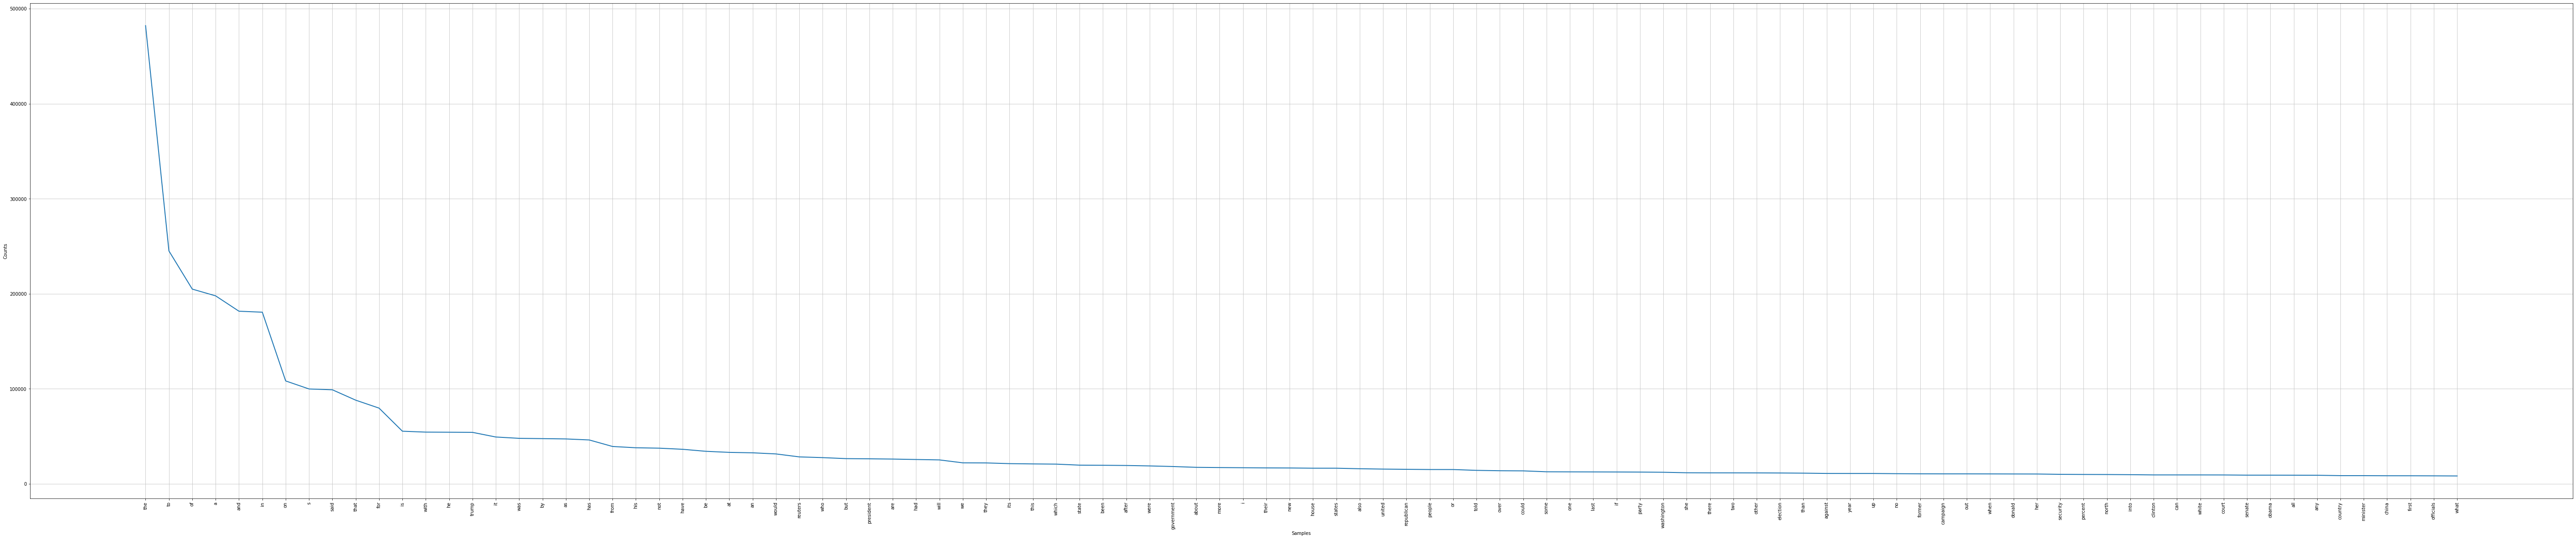

In [9]:
# Plot the 100 most common words in the true data
fig = plt.figure(figsize = (100,20))
fdist_true.plot(10,cumulative=False)
fig.savefig('true_freq.png', bbox_inches = "tight")
plt.show()

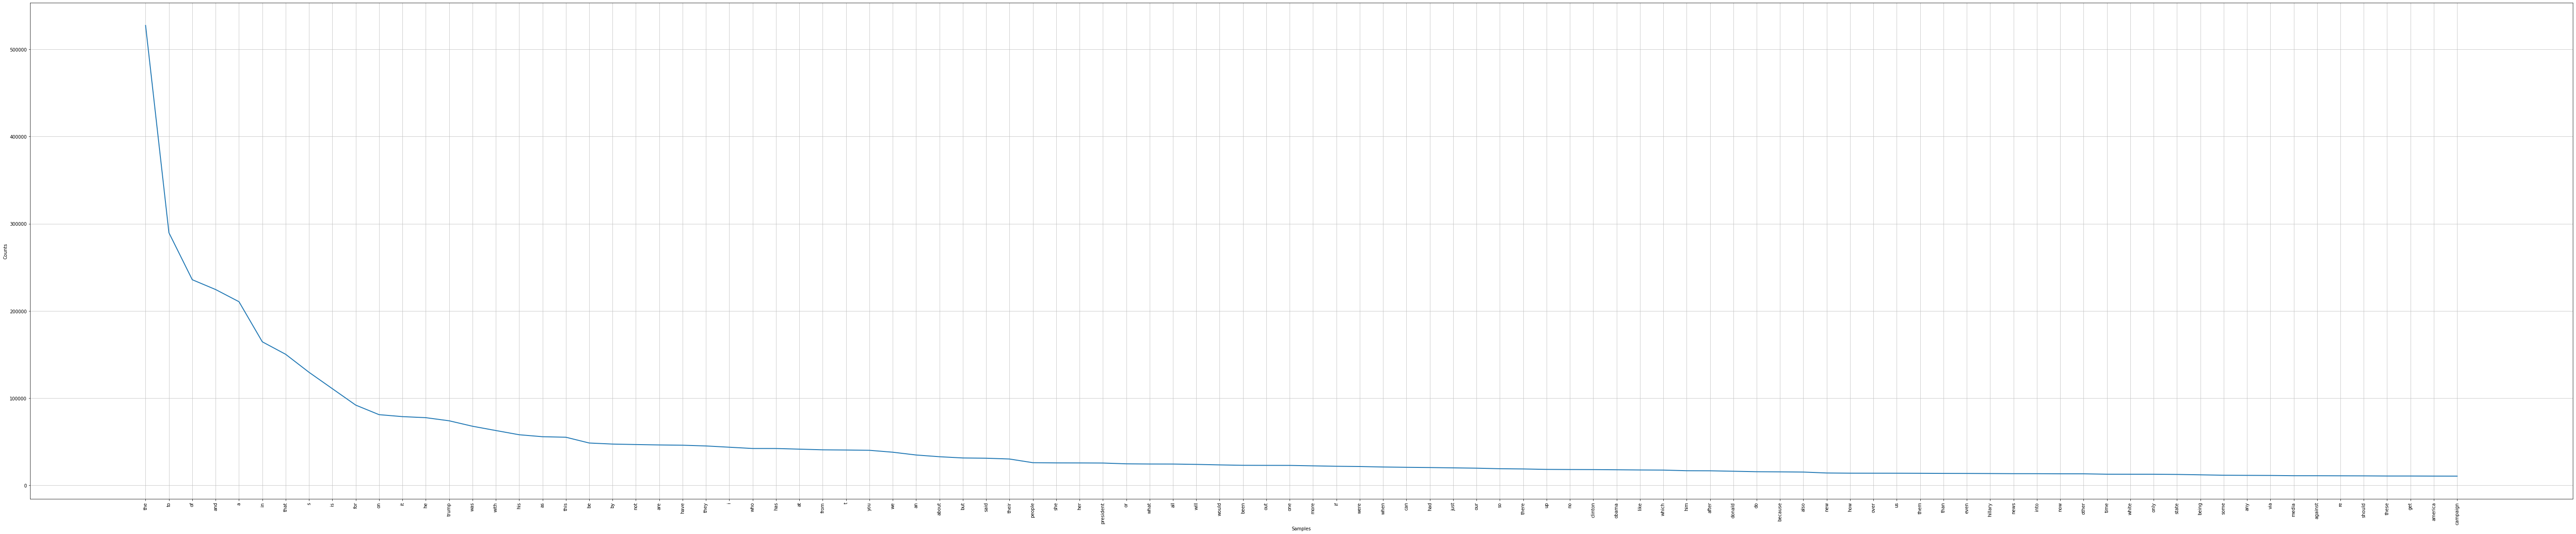

In [10]:
# Plot the 100 most common words in the fake data
fig = plt.figure(figsize = (100,20))
fdist_fake.plot(10,cumulative=False)
fig.savefig('fake_freq.png', bbox_inches = "tight")
plt.show()

In [11]:
# Remove the stop words from the true data
stop_words = stopwords.words('english')
true_tokenized = [word for word in true_tokenized if word not in stop_words]

In [12]:
# Remove the stop words from the fake data
fake_tokenized = [word for word in fake_tokenized if word not in stop_words]

In [13]:
# Print the 100 most common words in the true data
fdist_true = FreqDist(true_tokenized)
print("True: " + str(fdist_true.most_common(100)))

True: [('said', 99024), ('trump', 54238), ('would', 31524), ('reuters', 28412), ('president', 26386), ('state', 19726), ('government', 18285), ('new', 16743), ('house', 16513), ('states', 16506), ('also', 15946), ('united', 15575), ('republican', 15346), ('people', 15126), ('told', 14244), ('could', 13709), ('one', 12670), ('last', 12612), ('party', 12434), ('washington', 12238), ('two', 11619), ('election', 11474), ('year', 10968), ('former', 10601), ('campaign', 10554), ('donald', 10447), ('security', 10071), ('percent', 9936), ('north', 9868), ('clinton', 9453), ('white', 9443), ('court', 9404), ('senate', 9204), ('obama', 9197), ('country', 8685), ('minister', 8660), ('china', 8561), ('first', 8546), ('officials', 8474), ('since', 8332), ('tuesday', 8263), ('democratic', 8237), ('week', 8217), ('foreign', 8196), ('administration', 8191), ('national', 8184), ('including', 8119), ('presidential', 8011), ('wednesday', 8008), ('military', 7996), ('russia', 7821), ('may', 7811), ('law',

In [14]:
# Print the 100 most common words in the fake data
fdist_fake = FreqDist(fake_tokenized)
print("Fake: " + str(fdist_fake.most_common(100)))

Fake: [('trump', 74038), ('said', 31125), ('people', 25997), ('president', 25591), ('would', 23457), ('one', 22881), ('clinton', 18074), ('obama', 17865), ('like', 17643), ('donald', 16188), ('also', 15243), ('new', 14173), ('us', 13914), ('even', 13666), ('hillary', 13549), ('news', 13406), ('time', 12782), ('white', 12762), ('state', 12532), ('via', 11348), ('media', 11050), ('get', 10705), ('america', 10613), ('campaign', 10561), ('house', 10559), ('know', 10287), ('could', 10223), ('first', 10016), ('american', 9937), ('going', 9745), ('many', 9695), ('image', 9622), ('states', 9522), ('make', 9143), ('told', 9103), ('republican', 8928), ('right', 8896), ('country', 8684), ('made', 8666), ('government', 8600), ('police', 8564), ('say', 8551), ('way', 8457), ('back', 8397), ('think', 8358), ('two', 8308), ('years', 8259), ('video', 8068), ('election', 8019), ('united', 7974), ('last', 7771), ('may', 7628), ('political', 7546), ('party', 7459), ('black', 7454), ('see', 7305), ('want'

In [16]:
true_string = ' '.join(true_tokenized)
fake_string = ' '.join(fake_tokenized)

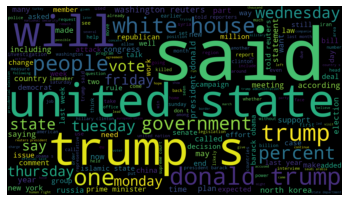

In [29]:
wordcloud = WordCloud(width=1920, height=1080).generate(true_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('true_wordcloud.png')

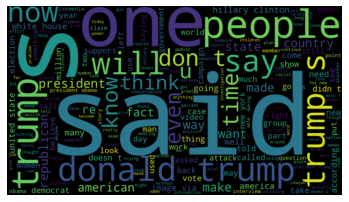

In [28]:
wordcloud = WordCloud(width=1920, height=1080).generate(fake_string)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('fake_wordcloud.png')

In [15]:
# Lemmatize the words in the true data
lemmatizer = WordNetLemmatizer()

with Pool(processes=8) as pool:
	true_tokenized = pool.map(lemmatizer.lemmatize, true_tokenized)
# true_tokenized = [lemmatizer.lemmatize(word) for word in true_tokenized]

In [16]:
# Lemmatize the words in the fake data
with Pool(processes=8) as pool:
	fake_tokenized = pool.map(lemmatizer.lemmatize, fake_tokenized)

# fake_tokenized = [lemmatizer.lemmatize(word) for word in fake_tokenized]

In [17]:
# Print the 100 most common words in the true data
fdist_true = FreqDist(true_tokenized)
print("True: " + str(fdist_true.most_common(100)))

True: [('said', 99024), ('trump', 54269), ('state', 36232), ('would', 31524), ('reuters', 28412), ('president', 26928), ('republican', 22095), ('government', 19430), ('year', 18710), ('house', 16900), ('new', 16743), ('also', 15946), ('united', 15575), ('people', 15193), ('party', 14962), ('official', 14575), ('told', 14244), ('country', 13924), ('election', 13900), ('could', 13709), ('one', 13019), ('last', 12630), ('washington', 12238), ('two', 11619), ('group', 11103), ('campaign', 11072), ('former', 10601), ('leader', 10498), ('donald', 10447), ('week', 10417), ('security', 10374), ('court', 10336), ('percent', 9936), ('say', 9930), ('north', 9868), ('minister', 9541), ('white', 9500), ('clinton', 9499), ('tax', 9225), ('law', 9214), ('senate', 9204), ('obama', 9197), ('time', 9037), ('vote', 8976), ('month', 8754), ('china', 8562), ('first', 8547), ('national', 8533), ('statement', 8521), ('administration', 8375), ('since', 8332), ('tuesday', 8263), ('democratic', 8237), ('foreign

In [18]:
# Print the 100 most common words in the fake data
fdist_fake = FreqDist(fake_tokenized)
print("Fake: " + str(fdist_fake.most_common(100)))

Fake: [('trump', 74200), ('said', 31125), ('president', 26158), ('people', 26080), ('one', 23698), ('would', 23457), ('state', 22054), ('clinton', 18706), ('like', 18190), ('obama', 17865), ('time', 17773), ('donald', 16188), ('american', 16057), ('republican', 15872), ('say', 15519), ('also', 15243), ('year', 14838), ('new', 14173), ('u', 14173), ('even', 13667), ('hillary', 13554), ('news', 13406), ('white', 13111), ('right', 12692), ('get', 12225), ('know', 11947), ('make', 11525), ('via', 11348), ('woman', 11198), ('medium', 11128), ('campaign', 11067), ('country', 10767), ('house', 10729), ('america', 10668), ('image', 10506), ('could', 10223), ('first', 10025), ('want', 9813), ('think', 9764), ('going', 9749), ('many', 9695), ('way', 9387), ('election', 9289), ('day', 9210), ('told', 9103), ('government', 9076), ('thing', 8944), ('video', 8825), ('made', 8666), ('law', 8604), ('back', 8601), ('police', 8574), ('go', 8438), ('two', 8309), ('black', 8040), ('show', 8032), ('party',

# Part 2

In [38]:
# Set the true and fake labels
true['label']=0
fake['label']=1
# Convert the true and fake data into a dataframe
true_pandas = pd.DataFrame(true.to_numpy())
fake_pandas = pd.DataFrame(fake.to_numpy())
# Combine the true and fake data into one dataframe
data = pd.concat([true_pandas,fake_pandas])
# Print the dataframe
print(data[4])

0        0
1        0
2        0
3        0
4        0
        ..
23476    1
23477    1
23478    1
23479    1
23480    1
Name: 4, Length: 44898, dtype: object


## Raw tokenized data

In [39]:
# Remove unwanted elements from out data like symbols and numbers and tokenize the data
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words=None,ngram_range = (1,1),tokenizer = token.tokenize)
data_clean_raw = cv.fit_transform(data[1])

In [40]:
# Create a dataset from the tokenized data
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(data_clean_raw, data[4].astype("int"), test_size=0.2, random_state=0)

In [22]:
# POS Tagging dataset
clf = SVC().fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("SVM Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))

SVM Accuracy: 0.9944320712694877
Precision: 0.9944060158802738
Recall: 0.9944409942517028


In [146]:
# Linear Support Vector Machine
clf = LinearSVC(max_iter=100000).fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("Linear Support Vector Machine Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))

Linear Support Vector Machine Accuracy: 0.9965478841870824
Precision: 0.9965379423818262
Recall: 0.996546798690362


In [24]:
# Stochastic Gradient Descent 
clf = SGDClassifier().fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("Stochastic Gradient Descent Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))

Stochastic Gradient Descent Accuracy: 0.994097995545657
Precision: 0.9942358279572523
Recall: 0.9939588229156833


In [25]:
# Perceptron
clf = Perceptron(max_iter=10000).fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("Perceptron Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))

Perceptron Accuracy: 0.9952115812917595
Precision: 0.9952172524226757
Recall: 0.9951904589197971


In [26]:
# Passive Aggressive Classifier
clf = PassiveAggressiveClassifier(max_iter=10000).fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("Passive Aggressive Classifier Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))

Passive Aggressive Classifier Accuracy: 0.9946547884187082
Precision: 0.9946127560763967
Recall: 0.994681955712774


In [27]:
# Neural Network
clf = MLPClassifier(max_iter=10000).fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("Neural Network Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))

Neural Network Accuracy: 0.9948775055679288
Precision: 0.9948605990655202
Recall: 0.9948782026759142


In [28]:
# MultinomialNB
clf = MultinomialNB().fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))

MultinomialNB Accuracy: 0.9561247216035634
Precision: 0.9559787252174787
Recall: 0.9561614094009747


In [29]:
# POS Tagging
clf = RandomForestClassifier().fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))

Random Forest Accuracy: 0.9876391982182628
Precision: 0.9876150750551755
Recall: 0.987623772214411


In [30]:
# K-Nearest Neighbor
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("K-Nearest Neighbor Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))

K-Nearest Neighbor Accuracy: 0.8983296213808464
Precision: 0.899235056898619
Recall: 0.8995476383292677


In [31]:
# Decision tree
clf = DecisionTreeClassifier().fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))

Decision Tree Accuracy: 0.9962138084632517
Precision: 0.9963165709177896
Recall: 0.9961093418522733


In [32]:
# AdaBoostClassifier
clf = AdaBoostClassifier().fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("AdaBoostClassifier Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))

AdaBoostClassifier Accuracy: 0.9959910913140312
Precision: 0.996011925962202
Recall: 0.9959578093870636


In [33]:
# GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("GradientBoostingClassifier Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))

GradientBoostingClassifier Accuracy: 0.9959910913140312
Precision: 0.9959431131775552
Recall: 0.9960293525837527


In [41]:
# BaggingClassifier
clf = BaggingClassifier().fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("BaggingClassifier Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))
print("Confusion Matrix:" + str(metrics.confusion_matrix(y_test_raw, predicted)))

BaggingClassifier Accuracy: 0.9971046770601336
Precision: 0.9971369590766715
Recall: 0.9970642447969713
Confusion Matrix:[[4293   17]
 [   9 4661]]


In [36]:
# POS Tagging dataset
clf = LogisticRegression(max_iter=1000).fit(X_train_raw, y_train_raw)
predicted= clf.predict(X_test_raw)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_raw, predicted))
print("Precision: " + str(metrics.precision_score(y_test_raw, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_raw, predicted, average='macro')))

Logistic Regression Accuracy: 0.9965478841870824
Precision: 0.9965293211393781
Recall: 0.9965557415899482


## Without stopwords

In [47]:
# Remove unwanted elements from out data like symbols and numbers and tokenize the data
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
data_clean_stop = cv.fit_transform(data[1])

In [48]:
# Create a dataset from the tokenized data
X_train_stop, X_test_stop, y_train_stop, y_test_stop = train_test_split(data_clean_stop, data[4].astype("int"), test_size=0.2, random_state=0)

In [39]:
# POS Tagging dataset
clf = SVC().fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("SVM Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))

SVM Accuracy: 0.9938752783964365
Precision: 0.9939466856276766
Recall: 0.9937894046513014


In [145]:
# Linear Support Vector Machine
clf = LinearSVC(max_iter=100000).fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("Linear Support Vector Machine Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))

Linear Support Vector Machine Accuracy: 0.9963251670378619
Precision: 0.9962978418463472
Recall: 0.9963416088276356


In [41]:
# Stochastic Gradient Descent 
clf = SGDClassifier().fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("Stochastic Gradient Descent Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))

Stochastic Gradient Descent Accuracy: 0.9951002227171493
Precision: 0.9951484940096116
Recall: 0.9950386780407101


In [42]:
# Perceptron
clf = Perceptron(max_iter=10000).fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("Perceptron Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))

Perceptron Accuracy: 0.994097995545657
Precision: 0.994035900974811
Recall: 0.9941466238069923


In [43]:
# Passive Aggressive Classifier
clf = PassiveAggressiveClassifier(max_iter=10000).fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("Passive Aggressive Classifier Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))

Passive Aggressive Classifier Accuracy: 0.9948775055679288
Precision: 0.9948781178056754
Recall: 0.994860316876742


In [44]:
# Neural Network
clf = MLPClassifier(max_iter=10000).fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("Neural Network Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))

Neural Network Accuracy: 0.9946547884187082
Precision: 0.9946127560763967
Recall: 0.994681955712774


In [45]:
# MultinomialNB
clf = MultinomialNB().fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))

MultinomialNB Accuracy: 0.9552338530066815
Precision: 0.9551148627813753
Recall: 0.955224392255449


In [46]:
# POS Tagging
clf = RandomForestClassifier().fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))

Random Forest Accuracy: 0.9900890868596882
Precision: 0.9899872866021229
Recall: 0.9901759763907452


In [47]:
# K-Nearest Neighbor
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("K-Nearest Neighbor Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))

K-Nearest Neighbor Accuracy: 0.821826280623608
Precision: 0.8235852762322429
Recall: 0.8233280503982074


In [51]:
# Decision tree
clf = DecisionTreeClassifier().fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))
print("Confusion Matrix:" + str(metrics.confusion_matrix(y_test_stop, predicted)))

Decision Tree Accuracy: 0.9968819599109131
Precision: 0.9969334951893423
Recall: 0.9968232833359003
Confusion Matrix:[[4290   20]
 [   8 4662]]


In [49]:
# AdaBoostClassifier
clf = AdaBoostClassifier().fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("AdaBoostClassifier Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))

AdaBoostClassifier Accuracy: 0.9951002227171493
Precision: 0.9950836667922602
Recall: 0.995101278337813


In [50]:
# GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("GradientBoostingClassifier Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))

GradientBoostingClassifier Accuracy: 0.9959910913140312
Precision: 0.9959354011518847
Recall: 0.9960382954833389


In [51]:
# BaggingClassifier
clf = BaggingClassifier().fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("BaggingClassifier Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))

BaggingClassifier Accuracy: 0.9971046770601336
Precision: 0.9971089546686001
Recall: 0.9970910734957297


In [52]:
# POS Tagging dataset
clf = LogisticRegression(max_iter=1000).fit(X_train_stop, y_train_stop)
predicted= clf.predict(X_test_stop)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_stop, predicted))
print("Precision: " + str(metrics.precision_score(y_test_stop, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_stop, predicted, average='macro')))

Logistic Regression Accuracy: 0.9968819599109131
Precision: 0.9968682086061814
Recall: 0.9968858836330032


## TF-IDF dataset

In [43]:
# Create a TF-IDF vectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data[1])

In [44]:
# Create a dataset from the TF-IDF vectorized data
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(text_tf, data[4].astype("int"), test_size=0.3, random_state=123)

In [55]:
# POS Tagging dataset
clf = SVC().fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("SVM Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

SVM Accuracy: 0.9926503340757238
Precision: 0.992652322621699
Recall: 0.9925842902516626


In [56]:
# Linear Support Vector Machine
clf = LinearSVC(max_iter=10000).fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("Linear Support Vector Machine Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

Linear Support Vector Machine Accuracy: 0.9942835931700075
Precision: 0.9943536885065074
Recall: 0.9941658959162964


In [57]:
# Stochastic Gradient Descent 
clf = SGDClassifier().fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("Stochastic Gradient Descent Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

Stochastic Gradient Descent Accuracy: 0.9896065330363771
Precision: 0.9895157793597193
Recall: 0.9896105071595371


In [58]:
# Perceptron
clf = Perceptron(max_iter=10000).fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("Perceptron Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

Perceptron Accuracy: 0.9912397921306607
Precision: 0.9911291700440843
Recall: 0.9912801901460517


In [59]:
# Passive Aggressive Classifier
clf = PassiveAggressiveClassifier(max_iter=10000).fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("Passive Aggressive Classifier Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

Passive Aggressive Classifier Accuracy: 0.9934669636228656
Precision: 0.993559409972769
Recall: 0.9933212680539414


In [60]:
# Neural Network
clf = MLPClassifier(max_iter=10000).fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("Neural Network Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

Neural Network Accuracy: 0.991833704528582
Precision: 0.991788959214907
Recall: 0.9918081669729926


In [61]:
# MultinomialNB
clf = MultinomialNB().fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

MultinomialNB Accuracy: 0.9398663697104677
Precision: 0.9400419928334367
Recall: 0.9391462978265337


In [62]:
# POS Tagging
clf = RandomForestClassifier().fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

Random Forest Accuracy: 0.9866369710467706
Precision: 0.986490901349717
Recall: 0.9866770319518974


In [63]:
# K-Nearest Neighbor
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("K-Nearest Neighbor Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

K-Nearest Neighbor Accuracy: 0.7147735708982925
Precision: 0.7923585538784901
Recall: 0.6967757522822886


In [49]:
# Decision tree
clf = DecisionTreeClassifier().fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

Decision Tree Accuracy: 0.9960653303637713
Precision: 0.9960726668239726
Recall: 0.9960238447318591


In [65]:
# AdaBoostClassifier
clf = AdaBoostClassifier().fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("AdaBoostClassifier Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

AdaBoostClassifier Accuracy: 0.9967334818114328
Precision: 0.9966630013176441
Recall: 0.9967780704561451


In [66]:
# GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("GradientBoostingClassifier Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

GradientBoostingClassifier Accuracy: 0.9960653303637713
Precision: 0.9959014398353867
Recall: 0.9962097857447187


In [45]:
# BaggingClassifier
clf = BaggingClassifier().fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("BaggingClassifier Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))
print("Confusion Matrix:" + str(metrics.confusion_matrix(y_test_tf, predicted)))

BaggingClassifier Accuracy: 0.9978470675575353
Precision: 0.9977674923152685
Recall: 0.9979111526547153
Confusion Matrix:[[6286    7]
 [  22 7155]]


In [68]:
# POS Tagging dataset
clf = LogisticRegression(max_iter=1000).fit(X_train_tf, y_train_tf)
predicted= clf.predict(X_test_tf)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_tf, predicted))
print("Precision: " + str(metrics.precision_score(y_test_tf, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_tf, predicted, average='macro')))

Logistic Regression Accuracy: 0.985894580549369
Precision: 0.9858243780667695
Recall: 0.9858433528667342


# Part 3

## Using just Nouns

In [69]:
lemmatizer = WordNetLemmatizer()


In [70]:
def lemmatize(p : list):
	token = nltk.word_tokenize(p)
	pos = nltk.pos_tag(token)
	lem = [(word[1], lemmatizer.lemmatize(word[0])) for word in pos if word[1] == "NN"]
	return lem

In [71]:
with Pool(processes=8) as pool:
	pos_tag_true_nouns = pool.map(lemmatize, true['text'])

In [72]:
with Pool(processes=8) as pool:
	pos_tag_fake_nouns = pool.map(lemmatize, fake['text'])

In [73]:
def join_nouns(p : list):
	return " ".join([word[1] for word in p])

In [74]:
pos_tag_nouns = pos_tag_true_nouns + pos_tag_fake_nouns

In [75]:
with Pool(processes=8) as pool:
	nouns_joined = pool.map(join_nouns, pos_tag_nouns)

In [77]:
nouns_labels = [0] * len(true) + [1] * len(fake)

In [78]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
nouns_tmp = cv.fit_transform(nouns_joined)

In [79]:
# Create dataset split with nouns
X_train_nouns, X_test_nouns, y_train_nouns, y_test_nouns = train_test_split(nouns_tmp, nouns_labels, test_size=0.3, random_state=123)

In [80]:
# POS Tagging dataset
clf = SVC().fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("SVM Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

SVM Accuracy: 0.9425389755011135
Precision: 0.9428602423488577
Recall: 0.9417228141142735


In [144]:
# Linear Support Vector Machine
clf = LinearSVC(max_iter=100000).fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("Linear Support Vector Machine Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

Linear Support Vector Machine Accuracy: 0.9476614699331849
Precision: 0.9482611284667446
Recall: 0.9466864184526107


In [82]:
# Stochastic Gradient Descent 
clf = SGDClassifier().fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("Stochastic Gradient Descent Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

Stochastic Gradient Descent Accuracy: 0.9466221232368226
Precision: 0.9474452386251494
Recall: 0.9454859940784496


In [83]:
# Perceptron
clf = Perceptron(max_iter=10000).fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("Perceptron Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

Perceptron Accuracy: 0.946325167037862
Precision: 0.9460519775065843
Recall: 0.946146817544728


In [84]:
# Passive Aggressive Classifier
clf = PassiveAggressiveClassifier(max_iter=10000).fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("Passive Aggressive Classifier Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

Passive Aggressive Classifier Accuracy: 0.9428359317000743
Precision: 0.942821052232125
Recall: 0.9423244322616204


In [85]:
# Neural Network
clf = MLPClassifier(max_iter=10000).fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("Neural Network Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

Neural Network Accuracy: 0.9537490720118782
Precision: 0.953798793683873
Recall: 0.9532798849973212


In [86]:
# MultinomialNB
clf = MultinomialNB().fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

MultinomialNB Accuracy: 0.9184112843355605
Precision: 0.9177836130165402
Recall: 0.9187189461293814


In [87]:
# POS Tagging
clf = RandomForestClassifier().fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

Random Forest Accuracy: 0.9487750556792873
Precision: 0.9481744968603016
Recall: 0.9495223288742104


In [88]:
# K-Nearest Neighbor
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("K-Nearest Neighbor Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

K-Nearest Neighbor Accuracy: 0.7410541945063103
Precision: 0.7425763595964823
Recall: 0.743300615936801


In [89]:
# Decision tree
clf = DecisionTreeClassifier().fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

Decision Tree Accuracy: 0.9000742390497402
Precision: 0.9004717255838333
Recall: 0.8987514430742962


In [90]:
# AdaBoostClassifier
clf = AdaBoostClassifier().fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("AdaBoostClassifier Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

AdaBoostClassifier Accuracy: 0.8725315515961396
Precision: 0.872274038248214
Recall: 0.8715251110813781


In [91]:
# GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("GradientBoostingClassifier Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

GradientBoostingClassifier Accuracy: 0.8956941351150706
Precision: 0.8953099366720174
Recall: 0.8969408872973172


In [92]:
# BaggingClassifier
clf = BaggingClassifier().fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("BaggingClassifier Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

BaggingClassifier Accuracy: 0.9203414996288047
Precision: 0.9197294653600421
Recall: 0.921146829168809


In [93]:
# POS Tagging dataset
clf = LogisticRegression(max_iter=1000).fit(X_train_nouns, y_train_nouns)
predicted= clf.predict(X_test_nouns)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_nouns, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nouns, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nouns, predicted, average='macro')))

Logistic Regression Accuracy: 0.9535263548626578
Precision: 0.9539879799547938
Recall: 0.9527087883653622


## Using Nouns and Verbs

In [94]:
lemmatizer = WordNetLemmatizer()

In [95]:
def lemmatize_nn_vb(p : list):
	token = nltk.word_tokenize(p)
	pos = nltk.pos_tag(token)
	lem = [(word[1], lemmatizer.lemmatize(word[0])) for word in pos if word[1] == "NN" or word[1] == "VB"]
	return lem

In [96]:
with Pool(processes=8) as pool:
	pos_tag_true_nn_vb = pool.map(lemmatize_nn_vb, true['text'])

In [97]:
with Pool(processes=8) as pool:
	pos_tag_fake_nn_vb = pool.map(lemmatize_nn_vb, fake['text'])

In [98]:
def join_nouns(p : list):
	return " ".join([word[1] for word in p])

In [99]:
pos_tag_nn_vb = pos_tag_true_nn_vb + pos_tag_fake_nn_vb

In [100]:
with Pool(processes=8) as pool:
	nn_vb_joined = pool.map(join_nouns, pos_tag_nn_vb)

In [101]:
nn_vb_labels = [0] * len(true) + [1] * len(fake)

In [102]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
nn_vb_tokens = cv.fit_transform(nn_vb_joined)

In [103]:
# Create dataset split with nn_vb
X_train_nn_vb, X_test_nn_vb, y_train_nn_vb, y_test_nn_vb = train_test_split(nn_vb_tokens, nn_vb_labels, test_size=0.3, random_state=123)

In [104]:
# POS Tagging dataset
clf = SVC().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("SVM Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

SVM Accuracy: 0.9469190794357832
Precision: 0.9471685654758555
Recall: 0.9462050486549709


In [143]:
# Linear Support Vector Machine
clf = LinearSVC(max_iter=100000).fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Linear Support Vector Machine Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Linear Support Vector Machine Accuracy: 0.9487008166295472
Precision: 0.9496826064319757
Recall: 0.9474856016937592


In [106]:
# Stochastic Gradient Descent 
clf = SGDClassifier().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Stochastic Gradient Descent Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Stochastic Gradient Descent Accuracy: 0.9502598366740905
Precision: 0.9516027855788249
Recall: 0.9488507448301458


In [107]:
# Perceptron
clf = Perceptron(max_iter=10000).fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Perceptron Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Perceptron Accuracy: 0.948626577579807
Precision: 0.9492830997305404
Recall: 0.9476214484530352


In [108]:
# Passive Aggressive Classifier
clf = PassiveAggressiveClassifier(max_iter=10000).fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Passive Aggressive Classifier Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Passive Aggressive Classifier Accuracy: 0.9449146250927988
Precision: 0.9456413695372794
Recall: 0.9438249350529386


In [109]:
# Neural Network
clf = MLPClassifier(max_iter=10000).fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Neural Network Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Neural Network Accuracy: 0.9515219005196733
Precision: 0.9520553026360234
Recall: 0.9506320522053638


In [110]:
# MLPClassifier
clf = MLPClassifier(max_iter=10000).fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("MLPClassifier Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

MLPClassifier Accuracy: 0.9547141796585004
Precision: 0.9551069009674772
Recall: 0.9539604694012012


In [111]:
# MultinomialNB
clf = MultinomialNB().fit(X_train_nn_vb, y_train_nouns)
predicted= clf.predict(X_test_nn_vb)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

MultinomialNB Accuracy: 0.9214550853749072
Precision: 0.9208257911533219
Recall: 0.9218297383888772


In [112]:
# POS Tagging
clf = RandomForestClassifier().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Random Forest Accuracy: 0.9546399406087602
Precision: 0.9541075511901049
Recall: 0.9550358075938725


In [113]:
# K-Nearest Neighbor
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("K-Nearest Neighbor Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

K-Nearest Neighbor Accuracy: 0.7352635486265776
Precision: 0.7343593628261785
Recall: 0.7350383299087315


In [114]:
# Decision tree
clf = DecisionTreeClassifier().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Decision Tree Accuracy: 0.8961395694135115
Precision: 0.8967814690287522
Recall: 0.8945893467932957


In [115]:
# AdaBoostClassifier
clf = AdaBoostClassifier().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("AdaBoostClassifier Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

AdaBoostClassifier Accuracy: 0.8766889383815887
Precision: 0.8774737248265938
Recall: 0.8748099213678528


In [116]:
# GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("GradientBoostingClassifier Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

GradientBoostingClassifier Accuracy: 0.8757980697847068
Precision: 0.8797731878647508
Recall: 0.8796597979123637


In [117]:
# BaggingClassifier
clf = BaggingClassifier().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("BaggingClassifier Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

BaggingClassifier Accuracy: 0.9182628062360801
Precision: 0.917621776504298
Recall: 0.918873203218759


In [118]:
# POS Tagging dataset
clf = LogisticRegression(max_iter=1000).fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Logistic Regression Accuracy: 0.9537490720118782
Precision: 0.9543824492470058
Recall: 0.9528101392806234


## Nouns and Adjectives

In [52]:
lemmatizer = WordNetLemmatizer()

In [53]:
def lemmatize_nn_vb(p : list):
	token = nltk.word_tokenize(p)
	pos = nltk.pos_tag(token)
	lem = [(word[1], lemmatizer.lemmatize(word[0])) for word in pos if word[1] == "NN" or word[1] == "JJ"]
	return lem

In [54]:
with Pool(processes=8) as pool:
	pos_tag_true_nn_vb = pool.map(lemmatize_nn_vb, true['text'])

In [55]:
with Pool(processes=8) as pool:
	pos_tag_fake_nn_vb = pool.map(lemmatize_nn_vb, fake['text'])

In [56]:
def join_nouns(p : list):
	return " ".join([word[1] for word in p])

In [57]:
pos_tag_nn_vb = pos_tag_true_nn_vb + pos_tag_fake_nn_vb

In [58]:
with Pool(processes=8) as pool:
	nn_vb_joined = pool.map(join_nouns, pos_tag_nn_vb)

In [59]:
nn_vb_labels = [0] * len(true) + [1] * len(fake)

In [60]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
nn_vb_tokens = cv.fit_transform(nn_vb_joined)

In [61]:
# Create dataset split with nn_vb
X_train_nn_vb, X_test_nn_vb, y_train_nn_vb, y_test_nn_vb = train_test_split(nn_vb_tokens, nn_vb_labels, test_size=0.3, random_state=123)

In [62]:
# POS Tagging dataset
clf = SVC().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("SVM Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

SVM Accuracy: 0.9537490720118782
Precision: 0.9538090343103969
Recall: 0.9532700986282234


In [63]:
# Linear Support Vector Machine
clf = LinearSVC(max_iter=100000).fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Linear Support Vector Machine Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Linear Support Vector Machine Accuracy: 0.9524127691165553
Precision: 0.9529939094967315
Recall: 0.951497415214009


In [64]:
# Stochastic Gradient Descent 
clf = SGDClassifier().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Stochastic Gradient Descent Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Stochastic Gradient Descent Accuracy: 0.9562731997030438
Precision: 0.9567087094863007
Recall: 0.9555017671813493


In [65]:
# Perceptron
clf = Perceptron(max_iter=10000).fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Perceptron Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Perceptron Accuracy: 0.9541945063103192
Precision: 0.9547754231640677
Recall: 0.9532966458149843


In [66]:
# Passive Aggressive Classifier
clf = PassiveAggressiveClassifier(max_iter=10000).fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Passive Aggressive Classifier Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Passive Aggressive Classifier Accuracy: 0.9555308092056422
Precision: 0.9561218845795015
Recall: 0.9546387289888925


In [67]:
# Neural Network
clf = MLPClassifier(max_iter=10000).fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Neural Network Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Neural Network Accuracy: 0.9603563474387528
Precision: 0.9606148126454077
Recall: 0.9597640519695168


In [70]:
# MultinomialNB
clf = MultinomialNB().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

MultinomialNB Accuracy: 0.9282850779510022
Precision: 0.9276892176890567
Recall: 0.9285816245509977


In [71]:
# POS Tagging
clf = RandomForestClassifier().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Random Forest Accuracy: 0.9602078693392725
Precision: 0.9596451915917832
Recall: 0.9607892959086046


In [72]:
# K-Nearest Neighbor
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("K-Nearest Neighbor Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

K-Nearest Neighbor Accuracy: 0.7582034149962881
Precision: 0.7577254168348495
Recall: 0.7587673634155544


In [73]:
# Decision tree
clf = DecisionTreeClassifier().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Decision Tree Accuracy: 0.9057164068299925
Precision: 0.9058462440317684
Recall: 0.9046822484408842


In [74]:
# AdaBoostClassifier
clf = AdaBoostClassifier().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("AdaBoostClassifier Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

AdaBoostClassifier Accuracy: 0.8855976243504083
Precision: 0.8856267000561289
Recall: 0.8844324019949934


In [75]:
# GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("GradientBoostingClassifier Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

GradientBoostingClassifier Accuracy: 0.88634001484781
Precision: 0.8894425760405869
Recall: 0.8898754609252534


In [76]:
# BaggingClassifier
clf = BaggingClassifier().fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("BaggingClassifier Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

BaggingClassifier Accuracy: 0.932293986636971
Precision: 0.931696138334696
Recall: 0.9331656971113007


In [77]:
# POS Tagging dataset
clf = LogisticRegression(max_iter=1000).fit(X_train_nn_vb, y_train_nn_vb)
predicted= clf.predict(X_test_nn_vb)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_nn_vb, predicted))
print("Precision: " + str(metrics.precision_score(y_test_nn_vb, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_nn_vb, predicted, average='macro')))

Logistic Regression Accuracy: 0.9608017817371938
Precision: 0.9612755251315364
Recall: 0.9600450447528224


## Adjectives

In [119]:
lemmatizer = WordNetLemmatizer()

In [120]:
def lemmatize_jj(p : list):
	token = nltk.word_tokenize(p)
	pos = nltk.pos_tag(token)
	lem = [(word[1], lemmatizer.lemmatize(word[0])) for word in pos if word[1] == "JJ"]
	return lem

In [121]:
with Pool(processes=8) as pool:
	pos_tag_true_jj = pool.map(lemmatize_jj, true['text'])

In [122]:
with Pool(processes=8) as pool:
	pos_tag_fake_jj = pool.map(lemmatize_jj, fake['text'])

In [123]:
def join_nouns(p : list):
	return " ".join([word[1] for word in p])

In [124]:
pos_tag_jj = pos_tag_true_jj + pos_tag_fake_jj

In [125]:
with Pool(processes=8) as pool:
	jj_joined = pool.map(join_nouns, pos_tag_jj)

In [126]:
jj_labels = [0] * len(true) + [1] * len(fake)

In [127]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
jj_tokens = cv.fit_transform(jj_joined)

In [128]:
# Create dataset split with jj
X_train_jj, X_test_jj, y_train_jj, y_test_jj = train_test_split(jj_tokens, jj_labels, test_size=0.3, random_state=123)

In [129]:
# POS Tagging dataset
clf = SVC().fit(X_train_jj, y_train_jj)
predicted= clf.predict(X_test_jj)
print("SVM Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

SVM Accuracy: 0.907720861172977
Precision: 0.9073247891195408
Recall: 0.9073168076394611


In [147]:
# Linear Support Vector Machine
clf = LinearSVC(max_iter=100000).fit(X_train_jj, y_train_jj)
predicted= clf.predict(X_test_jj)
print("Linear Support Vector Machine Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

Linear Support Vector Machine Accuracy: 0.9125463994060876
Precision: 0.9129620316472402
Recall: 0.9113460572811238


In [131]:
# Stochastic Gradient Descent 
clf = SGDClassifier().fit(X_train_jj, y_train_jj)
predicted= clf.predict(X_test_jj)
print("Stochastic Gradient Descent Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

Stochastic Gradient Descent Accuracy: 0.8900519673348181
Precision: 0.8895663827543937
Recall: 0.891107945621708


In [132]:
# Perceptron
clf = Perceptron(max_iter=10000).fit(X_train_jj, y_train_jj)
predicted= clf.predict(X_test_jj)
print("Perceptron Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

Perceptron Accuracy: 0.8991833704528582
Precision: 0.9014985360256321
Recall: 0.8967215021430045


In [133]:
# Passive Aggressive Classifier
clf = PassiveAggressiveClassifier(max_iter=10000).fit(X_train_jj, y_train_jj)
predicted= clf.predict(X_test_jj)
print("Passive Aggressive Classifier Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

Passive Aggressive Classifier Accuracy: 0.8778025241276912
Precision: 0.8773985134583124
Recall: 0.8789474188794691


In [134]:
# Neural Network
clf = MLPClassifier(max_iter=10000).fit(X_train_jj, y_train_jj)
predicted= clf.predict(X_test_jj)
print("Neural Network Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

Neural Network Accuracy: 0.9207869339272458
Precision: 0.9207568743859067
Recall: 0.9200675166475105


In [135]:
# MultinomialNB
clf = MultinomialNB().fit(X_train_jj, y_train_nouns)
predicted= clf.predict(X_test_jj)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

MultinomialNB Accuracy: 0.9024498886414254
Precision: 0.9018669449012877
Recall: 0.9023606648540333


In [136]:
# POS Tagging
clf = RandomForestClassifier().fit(X_train_jj, y_train_jj)
predicted= clf.predict(X_test_jj)
print("Random Forest Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

Random Forest Accuracy: 0.9232368225686711
Precision: 0.9226020855895565
Recall: 0.9238638418482015


In [137]:
# K-Nearest Neighbor
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train_jj, y_train_jj)
predicted= clf.predict(X_test_jj)
print("K-Nearest Neighbor Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

K-Nearest Neighbor Accuracy: 0.7373422420193022
Precision: 0.7440223806008006
Recall: 0.7420387721330528


In [138]:
# Decision tree
clf = DecisionTreeClassifier().fit(X_train_jj, y_train_jj)
predicted= clf.predict(X_test_jj)
print("Decision Tree Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

Decision Tree Accuracy: 0.8540460282108389
Precision: 0.853576504834174
Recall: 0.8531015295275679


In [139]:
# AdaBoostClassifier
clf = AdaBoostClassifier().fit(X_train_jj, y_train_jj)
predicted= clf.predict(X_test_jj)
print("AdaBoostClassifier Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

AdaBoostClassifier Accuracy: 0.8051967334818114
Precision: 0.8141429636059903
Recall: 0.8106173735373612


In [140]:
# GradientBoostingClassifier
clf = GradientBoostingClassifier().fit(X_train_jj, y_train_jj)
predicted= clf.predict(X_test_jj)
print("GradientBoostingClassifier Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

GradientBoostingClassifier Accuracy: 0.8191536748329621
Precision: 0.828809236725293
Recall: 0.8247716958544387


In [141]:
# BaggingClassifier
clf = BaggingClassifier().fit(X_train_jj, y_train_jj)
predicted= clf.predict(X_test_jj)
print("BaggingClassifier Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

BaggingClassifier Accuracy: 0.8774313288789903
Precision: 0.8774362093097248
Recall: 0.8790688296372704


In [142]:
# POS Tagging dataset
clf = LogisticRegression(max_iter=1000).fit(X_train_jj, y_train_jj)
predicted= clf.predict(X_test_jj)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test_jj, predicted))
print("Precision: " + str(metrics.precision_score(y_test_jj, predicted, average='macro')))
print("Recall: " + str(metrics.recall_score(y_test_jj, predicted, average='macro')))

Logistic Regression Accuracy: 0.9139569413511507
Precision: 0.9140860194907874
Recall: 0.913012253043356


# Part 4
## Future Work

BERT! Ok how can we not talk about BERT right now. Ever since BERT came out a couple of years ago it has taken over. Everyone seems to be using it these days. In the future I think we could get better results if BERT was fine-tuned along with adding a classifier in at the end. It would probably make sense to use a couple of fully connected layers and a sigmoid function as the classifier. Using this model should give us a better understanding of the context of the words in the sentence. 

Another thing that could be done is to add a satire label to the model. Sometimes people are making fun of people who believe the fake information. It is hard to classify this as true or fake information because it really isn’t either. Hence why there should be a satire label. Given only true and fake labels it would be hard for a model to be able to classify satire text snippets correctly

It would be interesting to do a combination of fact checking and classification. For each of the statements in the text snippets fact checking could be done to make sure that the information is true. From there it would be simple to classify it as true vs false just based on if the whole statement is true. If the fact check is unsure the text could be classified based on the wording using a classifier. If the fact checker determines that something is false the statement could then be passed into a context classifier to determine if it is satire or not. 

Try an LSTM. It would be interesting seeing the results of an LSTM classifying the text snippets. Using an LSTM would allow for more contextual understanding. 

It would also be interesting to use a genetic optimizer. I am personally obsessed with this type of machine learning. It is the part of machine learning I would like to do a lot of research in the future. 

This isn’t strictly about machine learning, but it would be interesting to get a crowd sourced dataset of people on the internet voting whether or not a statement is false. Then given that dataset it would be interesting to compare it to the classification of several different machine learning models. It would be most interesting to look at the ones that mess up both humans and computers and figure out why. There may be a way to phrase or put a statement that makes it look believable even if the information is not. 

It would be interesting to fact check inside the same statement. The model would be checking for consistency in the statement. For example it would check to make sure that the ball that was thrown through the window doesn’t go from green to red in the same statement. If facts are changing throughout the statement then it would seem that the statement is trying to be deceptive. This approach would probably work less for written text and more for speech since written text can be proof read. It could be applied to such things as verbal questions and answers and videos.  I’m not sure how to go about building a model to do such a thing, but it would be interesting to work on.  

Try a standard RNN. It would be interesting almost just as a baseline to compare the other models. 

